## NeXtCortex project

The installation of the packages DrWatson, SpikingNeuralNetworks, UnPack, Logging, Plots, Statistics, Random, CSV, DataFrames, Unitful are required to run this file.

The file src/networks_utils.jl is also required.

In [1]:
using DrWatson
findproject(@__DIR__) |> quickactivate

include("src/network_utils.jl")
using .NetworkUtils

using SpikingNeuralNetworks
using UnPack
using Logging
using Plots
using Statistics
using Random
using CSV
using DataFrames
import SpikingNeuralNetworks: @update

global_logger(NullLogger())
SNN.@load_units

import SpikingNeuralNetworks: PoissonLayer, monitor!, sim!, SingleExpSynapse, IFParameter, PostSpike, STTC

img_path = "plots_and_images";

#### Network baseline configuration

In [2]:
TC3inhib_network = (
    # Number of neurons in each population
    Npop = (TE=200, CE=4000, PV=400, SST=300, VIP=300),
    seed = 1234,

    # Parameters for cortical and thalamic excitatory neurons
    exc = IFParameter(
        τm=200pF / 10nS,  # Membrane time constant
        El=-70mV,         # Leak reversal potential
        Vt=-50.0mV,       # Spike threshold
        Vr=-70.0f0mV,     # Reset potential
        R=1 / 10nS,       # Membrane resistance
    ),

    # Parameters for the different populations of inhibitory neurons
    inh_PV  = IFParameter(τm=100pF/10nS, El=-70mV, Vt=-53mV, Vr=-70mV, R=1/10nS),
    inh_SST = IFParameter(τm=200pF/10nS, El=-70mV, Vt=-53mV, Vr=-70mV, R=1/10nS),
    inh_VIP = IFParameter(τm=150pF/10nS, El=-70mV, Vt=-53mV, Vr=-70mV, R=1/10nS),

    # Spiking threshold properties: absolute refractory period
    spike     = PostSpike(τabs=5ms),
    spike_PV  = PostSpike(τabs=2ms),
    spike_SST = PostSpike(τabs=10ms),
    spike_VIP = PostSpike(τabs=5ms),

    # Synaptic properties
    synapse=SingleExpSynapse(
        τi=5ms,             # Inhibitory synaptic time constant
        τe=5ms,             # Excitatory synaptic time constant
        E_i=-80mV,          # Inhibitory reversal potential
        E_e=0mV             # Excitatory reversal potential
    ),
    synapse_PV  = SingleExpSynapse(τi=5ms, τe=5ms, E_i=-80mV, E_e=0mV),
    synapse_SST = SingleExpSynapse(τi=12ms, τe=5ms, E_i=-80mV, E_e=0mV),
    synapse_VIP = SingleExpSynapse(τi=7ms, τe=5ms, E_i=-80mV, E_e=0mV),

    # Connection probabilities and synaptic weights
    connections = (
        TE_to_CE = (p=0.05, μ=4nS, rule=:Fixed),
        TE_to_PV = (p=0.05, μ=4nS, rule=:Fixed),

        CE_to_CE = (p=0.05, μ=2nS, rule=:Fixed),
        CE_to_PV = (p=0.05, μ=2nS, rule=:Fixed),
        CE_to_TE = (p=0.05, μ=2nS, rule=:Fixed),
        CE_to_SST = (p=0.05, μ=2nS, rule=:Fixed),
        CE_to_VIP = (p=0.05, μ=2nS, rule=:Fixed),

        PV_to_CE  = (p=0.05, μ=10nS, rule=:Fixed),
        PV_to_PV  = (p=0.05, μ=10nS, rule=:Fixed),
        PV_to_SST = (p=0.05, μ=10nS, rule=:Fixed),

        SST_to_CE  = (p=0.025, μ=10nS, rule=:Fixed),
        SST_to_PV  = (p=0.025, μ=10nS, rule=:Fixed),
        SST_to_VIP = (p=0.025, μ=10nS, rule=:Fixed),

        VIP_to_SST = (p=0.3, μ=10nS, rule=:Fixed),
    ),

    # Parameters for external Poisson input
    afferents_to_TE=(
        layer=PoissonLayer(rate=1.5Hz, N=1000),           # Poisson input layer
        conn=(p=0.05, μ=4nS, rule=:Fixed),              # Connection probability and weight
    ),
    afferents_to_CE  = (layer=PoissonLayer(rate=1.5Hz, N=1000), conn=(p=0.02, μ=4nS, rule=:Fixed)),
    afferents_to_PV  = (layer=PoissonLayer(rate=1.5Hz, N=1000), conn=(p=0.02, μ=4nS, rule=:Fixed)),
    afferents_to_SST = (layer=PoissonLayer(rate=1.5Hz, N=1000), conn=(p=0.15, μ=2nS, rule=:Fixed)),
    afferents_to_VIP = (layer=PoissonLayer(rate=1.5Hz, N=1000), conn=(p=0.10, μ=2nS, rule=:Fixed)),
);

In [3]:
# Build and simulate
model = NetworkUtils.build_network(TC3inhib_network)
monitor!(model.pop, [:v], sr=1kHz)


Random.seed!(TC3inhib_network.seed)
sim!(model, 3s);

"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:-2, -0s/it]
5.3%┣██▎                                        ┫ 55/1.0k [00:00<00:04, 251it/s]
78.5%┣███████████████████████████████▍        ┫ 816/1.0k [00:00<00:00, 3.0kit/s]
100.0%┣██████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 3.8kit/s]
100.0%┣██████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 3.8kit/s]


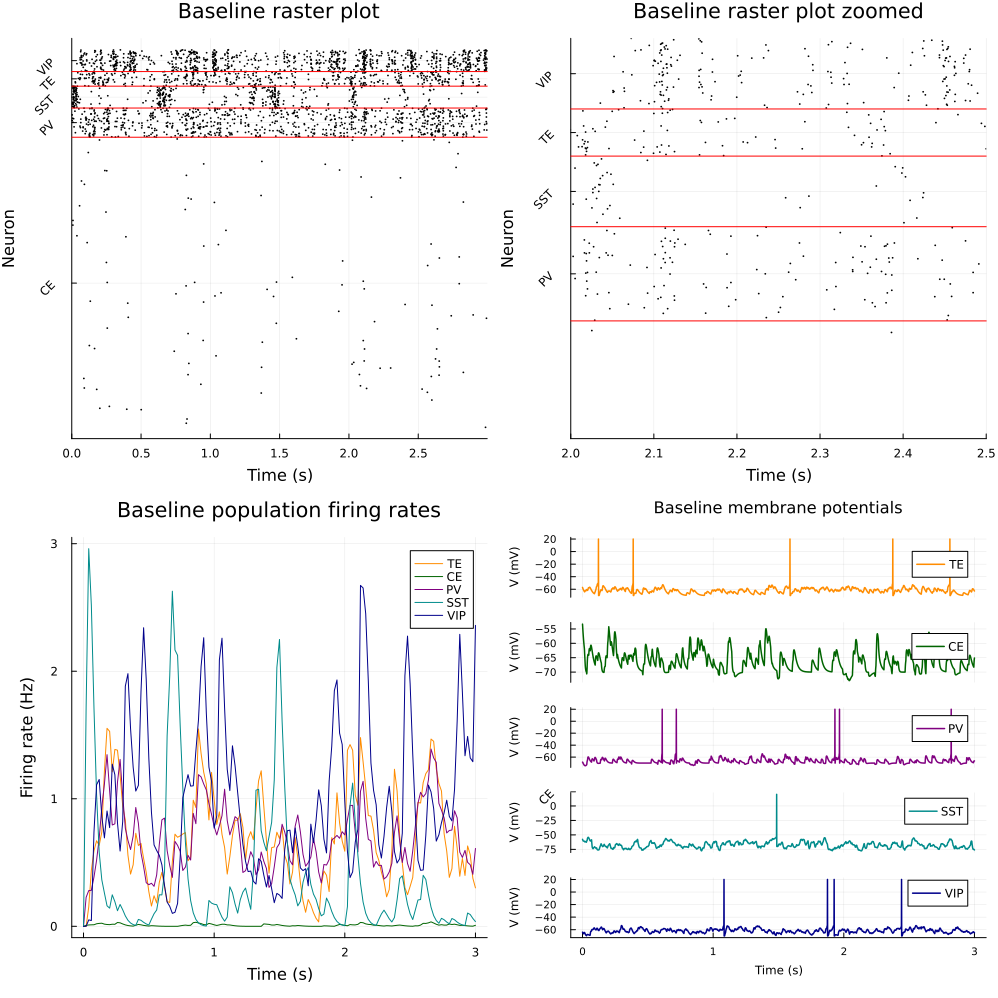

"/Users/zhangxiaomeng/Documents/GitHub/NeXtCortex/plots_and_images/Baseline tight_layout.png"

In [4]:
rplt, zrplt, frplt, vplt = NetworkUtils.analysis(model, img_path)

#Display of the baseline network activity
plts = plot(rplt, zrplt, frplt, vplt, layout=(2,2), size=(1000,1000))
display(plts)
savefig(plts, "$img_path/Baseline tight_layout.png")

#### Slower inhibition test (increasing PV membrane time constant)

"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
60.6%┣███████████████████████▋               ┫ 630/1.0k [00:00<00:00, 12.4kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.7kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.7kit/s]


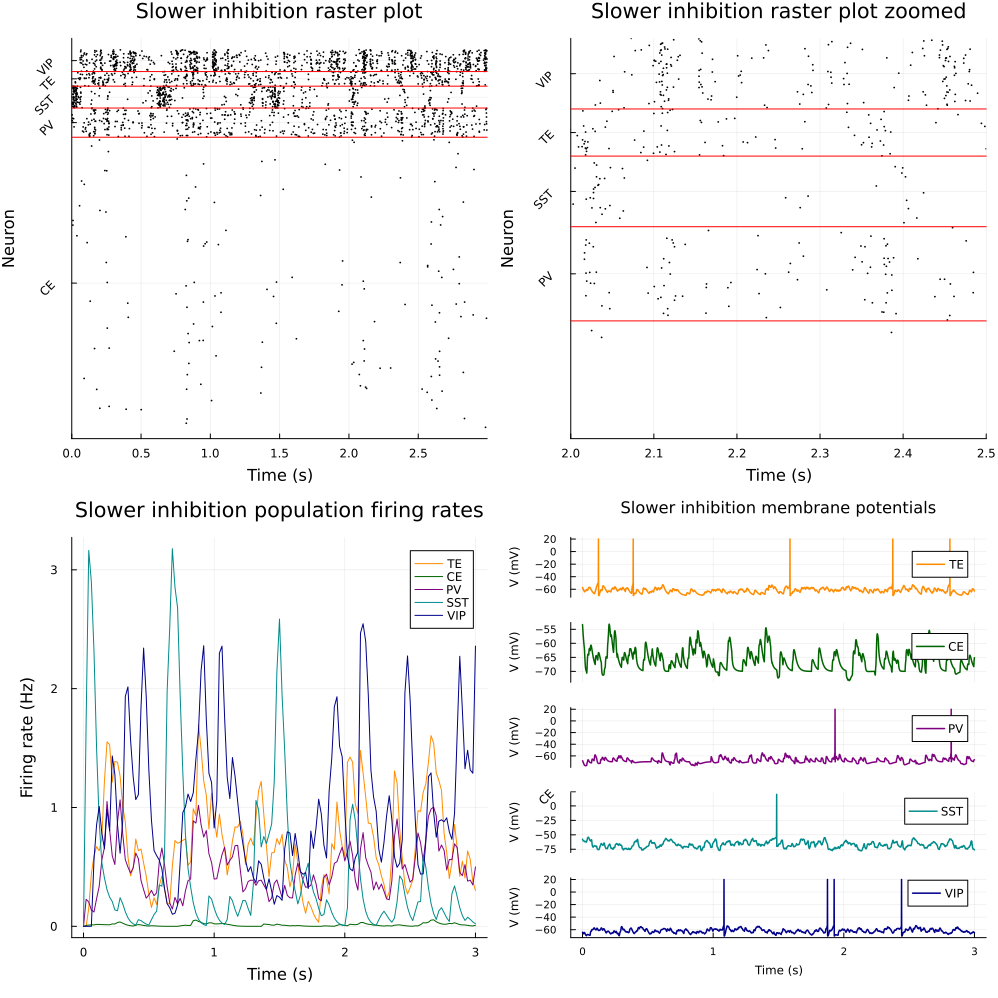

"/Users/zhangxiaomeng/Documents/GitHub/NeXtCortex/plots_and_images/Slower inhibition tight_layout.png"

In [5]:
TC3inhib_network_modified = (; TC3inhib_network..., 
    synapse_PV  = SingleExpSynapse(τi=20ms, τe=5ms, E_i=-80mV, E_e=0mV),
)

model = NetworkUtils.build_network(TC3inhib_network_modified)
monitor!(model.pop, [:v], sr=1kHz)
Random.seed!(TC3inhib_network_modified.seed)
sim!(model, 3s)

rplt, zrplt, frplt, vplt = NetworkUtils.analysis(model, img_path, name = "Slower inhibition")

plts = plot(rplt, zrplt, frplt, vplt, layout=(2,2), size=(1000,1000))
display(plts)
savefig(plts, "$img_path/Slower inhibition tight_layout.png")

#### Epileptic-like activity (increasing CE_to_CE)

In [6]:
p_values = [0.15]
µ_values = [TC3inhib_network.connections.CE_to_CE.µ]
pops_to_modify = (:CE_to_CE,)
name = "Epileptic-like state"

plts = NetworkUtils.network_modifications(TC3inhib_network, p_values, µ_values, pops_to_modify, name, img_path)
display(plts) #display the plts of the last p and µ of p_values and µ_values

UndefVarError: UndefVarError: `network_modifications` not defined in `Main.NetworkUtils`
Suggestion: check for spelling errors or missing imports.

#### Thalamic increased connection (increasing TE_to_CE)

In [7]:
p_values = [0.10, 0.15]
µ_values = [TC3inhib_network.connections.TE_to_CE.µ]
pops_to_modify = (:TE_to_CE,)
name = "Epileptic-like state"

plts = NetworkUtils.network_modifications(TC3inhib_network, p_values, µ_values, pops_to_modify, name, img_path)
display(plts) #display the plts of the last p value

UndefVarError: UndefVarError: `network_modifications` not defined in `Main.NetworkUtils`
Suggestion: check for spelling errors or missing imports.

#### PV/SST loss (via genetic knockout) → less connection propability

In [8]:
pops_to_modify = (:PV_to_CE, :PV_to_PV, :PV_to_SST, :SST_to_CE, :SST_to_PV, :SST_to_VIP)
p_values = [0.03, 0.02, 0.01, 0.0]
µ_values = [2, 5, 10]
name = "PV_SST loss"

plts = NetworkUtils.network_modifications(TC3inhib_network, p_values, µ_values, pops_to_modify, name, img_path)
display(plts) #display the plts of the last p and µ of p_values and µ_values

UndefVarError: UndefVarError: `network_modifications` not defined in `Main.NetworkUtils`
Suggestion: check for spelling errors or missing imports.

#### Optogenetic VIP inhibition → increases seizure threshold and shortens seizure duration.

In [9]:
p_values = [0.0]
µ_values = [10]
pops_to_modify = (:VIP_to_SST,)
name = "VIP_inhibition"

plts = NetworkUtils.network_modifications(TC3inhib_network, p_values, µ_values, pops_to_modify, name, img_path)
display(plts)

UndefVarError: UndefVarError: `network_modifications` not defined in `Main.NetworkUtils`
Suggestion: check for spelling errors or missing imports.

#### TEST heatmap

In [10]:
pops_to_modify = (:PV_to_CE,)
p_values = [0.2, 0.4]
µ_values = [0.1, 4]

for pop in pops_to_modify

    csvfile = "$img_path/Modulation $pop sttc_results.csv"
    open(csvfile, "w") do io
        write(io, "mu,p,onset_time\n")
    end

    for μ in μ_values, p in p_values

        modulation = (; TC3inhib_network.connections[pop]..., μ = μ, p = p)
        TC3inhib_network_modified = (; TC3inhib_network...,
            connections = (; TC3inhib_network.connections..., pop => modulation)
        )

        model = NetworkUtils.build_network(TC3inhib_network_modified)
        monitor!(model.pop, [:v], sr=1kHz)
        Random.seed!(TC3inhib_network_modified.seed)
        sim!(model, 3s)

        onset = NetworkUtils.epileptic_onset_time(model)
        open(csvfile, "a") do io
            write(io, "$μ,$p,$onset\n")
        end
    end

    df = CSV.read(csvfile, DataFrame)
    M = [ df[(df.mu .== μ) .& (df.p .== p), :onset_time][1]
          for μ in μ_values, p in p_values ]

    transition_heatmap = heatmap(
        p_values, μ_values, M,
        xlabel="p scale",
        ylabel="μ scale",
        title="Modulation $pop effect on epileptic onset time",
        color = :viridis,
        clims = (0, 3) # to get the same color scale every time
    )

    savefig(transition_heatmap, "$img_path/Modulation $pop transition_heatmap.png")
end

"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


UndefVarError: UndefVarError: `epileptic_onset_time` not defined in `Main.NetworkUtils`
Suggestion: check for spelling errors or missing imports.

#### Modulations Experiments

In [11]:
pops_to_modify = (:VIP_to_SST, :PV_to_CE, :SST_to_CE, :TE_to_CE)

μ_values = [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10]
p_values = [0.1, 0.2, 0.7, 1.0];

In [12]:
pops_to_modify = (:PV_to_CE, :TE_to_CE)

μ_values = [0.1, 1.0, 1.5]
p_values = [0.2, 0.7, 1.0];

In [13]:
for pop in pops_to_modify

    csvfile = "$img_path/Modulation $pop sttc_results.csv"
    open(csvfile, "w") do io
        write(io, "mu,p,sttc\n")
    end

    for μ in μ_values, p in p_values

        modulation = (; TC3inhib_network.connections[pop]..., μ = μ, p = p)
        TC3inhib_network_modified = (; TC3inhib_network...,
            connections = (; TC3inhib_network.connections..., pop => modulation)
        )

        model = NetworkUtils.build_network(TC3inhib_network_modified)
        monitor!(model.pop, [:v], sr=1kHz)
        Random.seed!(TC3inhib_network_modified.seed)
        sim!(model, 3s)

        NetworkUtils.analysis(model, img_path; name = "Modulation $pop", figs=false, csv = true, μ = μ, p = p)
    end

    df = CSV.read("$img_path/Modulation $pop sttc_results.csv", DataFrame)
    M = [ df[(df.mu .== μ) .& (df.p .== p), :sttc][1]
          for μ in μ_values, p in p_values ]

    sttc_heatmap = heatmap(
        p_values, μ_values, M,
        xlabel="p scale",
        ylabel="μ scale",
        title="Modulation $pop effect on synchrony",
        color = :viridis,
        clims = (0, 1) # to get the same color scale every time
    )

    savefig(sttc_heatmap, "$img_path/Modulation $pop sttc_heatmap.png")


    # Compute transition times with same threshold as sttc_heatmap
    T = [ NetworkUtils.average_transition_time(TC3inhib_network, pop, μ, p)
      for μ in μ_values, p in p_values ]

    transition_heatmap = heatmap(
        p_values, μ_values, T,
        xlabel = "p scale",
        ylabel = "μ scale",
        title  = "Transition time to synchrony for pop $pop",
        color  = :viridis,
        clims  = (0, 3),
        colorbar_title = "Time (s)"
    )

    savefig(transition_heatmap,
            "$img_path/Heatmap modulation $pop transition_time.png")

end

"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
0.1%┣                                         ┫ 1/1.0k [00:00<Inf:Inf, InfGs/it]
0.2%┣                                              ┫ 2/1.0k [00:00<04:42, 4it/s]
0.3%┣▏                                             ┫ 3/1.0k [00:00<03:15, 5it/s]
0.4%┣▏                                             ┫ 4/1.0k [00:00<02:49, 6it/s]
0.5%┣▏                                             ┫ 5/1.0k [00:01<02:35, 7it/s]
0.6%┣▎                                             ┫ 6/1.0k [00:01<02:27, 7it/s]
0.7%┣▎                                             ┫ 7/1.0k [00:01<02:23, 7it/s]
0.8%┣▍                                             ┫ 8/1.0k [00:01<02:18, 7it/s]
0.9%┣▍                                             ┫ 9/1.0k [00:01<02:14, 8it/s]
1.0%┣▍                                            ┫ 10/1.0k [00:01<02:11, 8it/s]
1.1%┣▌                                            ┫ 11/1.0k [00:01<02:10, 8it/s]
1.2%┣▌                      

"syn" * syn.name = "synSpikingSynapse"

96.9%┣███████████████████████████████████████▊ ┫ 1.0k/1.0k [01:02<00:02, 16it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:02<00:00, 17it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:02<00:00, 17it/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
0.1%┣                                         ┫ 1/1.0k [00:00<Inf:Inf, InfGs/it]
0.2%┣                                              ┫ 2/1.0k [00:00<08:04, 2it/s]
0.3%┣▏                                             ┫ 3/1.0k [00:01<04:55, 4it/s]
0.4%┣▏                                             ┫ 4/1.0k [00:01<03:58, 4it/s]
0.5%┣▏                                             ┫ 5/1.0k [00:01<03:43, 5it/s]
0.6%┣▎                                             ┫ 6/1.0k [00:01<03:20, 5it/s]
0.7%┣▎                                             ┫ 7/1.0k [00:01<03:07, 6it/s]
0.8%┣▍                                             ┫ 8/1.0k [00:01<02:54, 6it/s]
0.9%┣▍                                             ┫ 9/1.0k [00:01<02:45, 6it/s]
1.0%┣▍                                            ┫ 10/1.0k [00:01<02:40, 6it/s]
1.1%┣▌                                            ┫ 11/1.0k [00:01<02:34, 7it/s]
1.2%┣▌                      

"syn" * syn.name = "synSpikingSynapse"

96.1%┣████████████████████████████████████████▍ ┫ 999/1.0k [01:00<00:02, 17it/s]
97.5%┣████████████████████████████████████████ ┫ 1.0k/1.0k [01:00<00:02, 17it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:00<00:00, 17it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:00<00:00, 17it/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
50.1%┣███████████████████▌                   ┫ 521/1.0k [00:00<00:00, 10.3kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.3kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.2kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
37.9%┣███████████████▏                        ┫ 394/1.0k [00:00<00:00, 7.7kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 11.8kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 11.7kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
50.7%┣███████████████████▊                   ┫ 527/1.0k [00:00<00:00, 10.4kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.5kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.5kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
43.8%┣█████████████████▌                      ┫ 456/1.0k [00:00<00:00, 8.9kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 12.9kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 12.9kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
22.9%┣█████████▏                              ┫ 238/1.0k [00:00<00:00, 4.7kit/s]
100.0%

"syn" * syn.name = "synSpikingSynapse"

┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 10.4kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 10.4kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
41.9%┣████████████████▊                       ┫ 436/1.0k [00:00<00:00, 8.1kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 11.8kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 11.5kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
50.1%┣███████████████████▌                   ┫ 521/1.0k [00:00<00:00, 10.1kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.2kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.1kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synS

0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
61.9%┣████████████████████████▏              ┫ 644/1.0k [00:00<00:00, 12.7kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 16.0kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.9kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
62.1%┣████████████████████████▎              ┫ 646/1.0k [00:00<00:00, 12.8kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 16.0kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.9kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
56.6%┣██████████████████████                 ┫ 589/1.0k [00:00<00:00, 11.7kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.3kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.2kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
60.6%┣███████████████████████▋               ┫ 630/1.0k [00:00<00:00, 12.5kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.8kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 15.7kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
0.1%┣                                         ┫ 1/1.0k [00:00<Inf:Inf, InfGs/it]
0.2%┣                                              ┫ 2/1.0k [00:00<05:55, 3it/s]
0.3%┣▏                                             ┫ 3/1.0k [00:01<04:41, 4it/s]
0.4%┣▏                                             ┫ 4/1.0k [00:01<04:06, 4it/s]
0.5%┣▏                                             ┫ 5/1.0k [00:01<03:51, 4it/s]
0.6%┣▎                                             ┫ 6/1.0k [00:01<03:43, 5it/s]
0.7%┣▎                                             ┫ 7/1.0k [00:01<03:35, 5it/s]
0.8%┣▍                                             ┫ 8/1.0k [00:01<03:30, 5it/s]
0.9%┣▍                                             ┫ 9/1.0k [00:02<03:25, 5it/s]
1.0%┣▍                                            ┫ 10/1.0k [00:02<03:22, 5it/s]
1.1%┣▌                                            ┫ 11/1.0k [00:02<03:19, 5it/s]
1.2%┣▌                      

"syn" * syn.name = "synSpikingSynapse"

98.0%┣████████████████████████████████████████▏┫ 1.0k/1.0k [01:41<00:02, 10it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:41<00:00, 10it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:41<00:00, 10it/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
0.1%┣                                         ┫ 1/1.0k [00:00<Inf:Inf, InfGs/it]
0.2%┣                                              ┫ 2/1.0k [00:00<06:35, 3it/s]
0.3%┣▏                                             ┫ 3/1.0k [00:01<04:58, 3it/s]
0.4%┣▏                                             ┫ 4/1.0k [00:01<04:26, 4it/s]
0.5%┣▏                                             ┫ 5/1.0k [00:01<04:05, 4it/s]
0.6%┣▎                                             ┫ 6/1.0k [00:01<03:53, 4it/s]
0.7%┣▎                                             ┫ 7/1.0k [00:01<03:46, 5it/s]
0.8%┣▍                                             ┫ 8/1.0k [00:02<03:42, 5it/s]
0.9%┣▍                                             ┫ 9/1.0k [00:02<03:39, 5it/s]
1.0%┣▍                                            ┫ 10/1.0k [00:02<03:36, 5it/s]
1.1%┣▌                                            ┫ 11/1.0k [00:02<03:34, 5it/s]
1.2%┣▌                      

"syn" * syn.name = "synSpikingSynapse"

97.4%┣████████████████████████████████████████ ┫ 1.0k/1.0k [01:45<00:03, 10it/s]
99.2%┣████████████████████████████████████████▊┫ 1.0k/1.0k [01:46<00:01, 10it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:46<00:00, 10it/s]
100.0%┣████████████████████████████████████████┫ 1.0k/1.0k [01:46<00:00, 10it/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%

"syn" * syn.name = "synSpikingSynapse"

┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
52.1%┣████████████████████▎                  ┫ 542/1.0k [00:00<00:00, 10.7kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.7kit/s]
100.0%┣█████████████████████████████████████┫ 1.0k/1.0k [00:00<00:00, 14.7kit/s]



"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"
"syn" * syn.name = "synSpikingSynapse"


0.0%┣                                             ┫ 0/1.0k [00:00<00:00, -0s/it]
0.1%┣                                         ┫ 1/1.0k [00:00<Inf:Inf, InfGs/it]
0.2%┣                                              ┫ 2/1.0k [00:00<06:12, 3it/s]
0.3%┣▏                                             ┫ 3/1.0k [00:01<04:47, 4it/s]
0.4%┣▏                                             ┫ 4/1.0k [00:01<05:37, 3it/s]
0.5%┣▏                                             ┫ 5/1.0k [00:01<04:56, 3it/s]
0.6%┣▎                                             ┫ 6/1.0k [00:01<04:38, 4it/s]
0.7%┣▎                                             ┫ 7/1.0k [00:02<04:20, 4it/s]
0.8%┣▍                                             ┫ 8/1.0k [00:02<04:10, 4it/s]
0.9%┣▍                                             ┫ 9/1.0k [00:02<04:00, 4it/s]
1.0%┣▍                                            ┫ 10/1.0k [00:02<03:54, 4it/s]
1.1%┣▌                                            ┫ 11/1.0k [00:02<03:49, 4it/s]
1.2%┣▌                      